## Convolutional Neural Network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Accessing the dataset

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(xtrain,ytrain),(xtest,ytest) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Data Visualisation

Text(0.5, 1.0, '0')

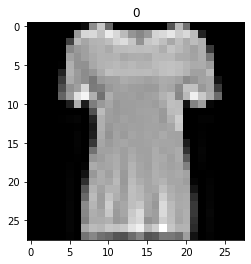

In [ ]:
plt.imshow(xtrain[10],'gray')
plt.title(ytrain[10])

Text(0.5, 1.0, '1')

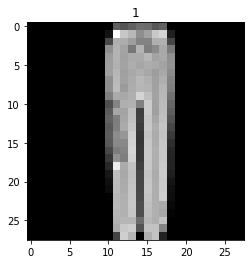

In [ ]:
plt.imshow(xtrain[1000],'gray')
plt.title(ytrain[1000])

In [ ]:
normalizer= tf.keras.layers.Normalization()
normalizer.adapt(xtrain)
normalizer.adapt(xtest)

xtrain= normalizer(xtrain)
xtest= normalizer(xtest)

In [ ]:
xtrain[10]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-0.16670531, -0.2376101 , -0.28802225, -0.37757662, -0.52558374,
        -0.65251243, -0.7358189 , -0.6852756 ,  0.6327944 ,  1.0896547 ,
        -0.08725115, -1.3389391 , -1.3584975 , -1.3151928 , -1.2840512 ,
        -1.4012004 , -1.4547346 , -1.4218723 , -0.35751435,  0.9113213 ,
         0.26074103, -0.8736935 , -0.807176  , -0.70910555, -0.577009  ,
        -0.47288555, -0.38387212, -0.24161945],
       [-0.16670531, -0.2376101 , -0.28802225, -0.37757662, -0.52558374,
        -0.65251243,  0.9857524 ,  1.5907    ,  1.4596157 ,  1.0238127 ,
         1.3554165 ,  1.0888851 ,  0.7365514 ,  0.350987  ,  0.22035567,
         0.32302642,  0.9605977 ,  1.0632173 ,  1.2815788 ,  1.1315068 ,
         1.4047415 ,  1.15751   , -0.43480533, -0.70910555, -0.577009  ,
        -0.47288555, -0.38387212, -0.24161945],
       [-0.16670531, -0.2376101 , -0.28802225, -0.37757662, -0.52558374,
         0.14364567,  1.3595146 ,  1.0525383 ,  1.0

## Building the model

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Epoch 1/2
1875/1875 [==============================] - 344s 182ms/step - loss: 0.4843 - accuracy: 0.8223
Epoch 2/2
313/313 [==============================] - 14s 43ms/step - loss: 0.2888 - accuracy: 0.8951


[0.28878894448280334, 0.8950999975204468]

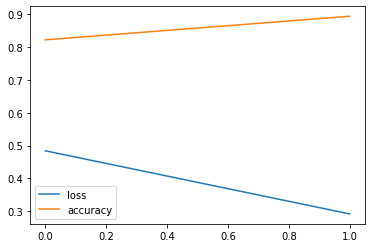

In [ ]:
tf.random.set_seed(100)
hist = model.fit(xtrain,ytrain,epochs=2)
pd.DataFrame(hist.history).plot();
model.evaluate(xtest,ytest)